In [1]:
#Dataset link - https://www.kaggle.com/datasets/brsdincer/star-type-classification 

# DATA PREPROCESSING 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df = pd.read_csv("/Users/soumobratamanna/Documents/AI_ML PROJECTS/Stars.csv")

In [4]:
df.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [5]:
df.tail(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
230,24145,382993.0,1494.0,-8.84,Blue-white,B,5
231,38234,272830.0,1356.0,-9.29,Blue,O,5
232,32489,648430.0,1948.5,-10.84,Blue,O,5
233,27739,849420.0,1252.0,-7.59,Blue-white,B,5
234,21904,748490.0,1130.0,-7.67,Blue-white,B,5
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


In [6]:
df['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [7]:
#Removing B,A,F ,K ,G from the spectral_class 

indexes=df[(df['Spectral_Class']=='A') | (df['Spectral_Class'] =='B')| (df['Spectral_Class'] =='F')|(df['Spectral_Class'] =='G')|(df['Spectral_Class'] =='K')].index
df.drop(indexes,inplace=True)

In [8]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [9]:
df.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
231,38234,272830.0,1356.0,-9.29,Blue,O,5
232,32489,648430.0,1948.5,-10.84,Blue,O,5
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


In [10]:
#Encoding M and O into 1 and 2
df['Spectral_Class'] = df['Spectral_Class'].map({'M':1,'O':2})

In [11]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,1,0
1,3042,0.000500,0.1542,16.60,Red,1,0
2,2600,0.000300,0.1020,18.70,Red,1,0
3,2800,0.000200,0.1600,16.65,Red,1,0
4,1939,0.000138,0.1030,20.06,Red,1,0


In [12]:
df.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
231,38234,272830.0,1356.0,-9.29,Blue,2,5
232,32489,648430.0,1948.5,-10.84,Blue,2,5
235,38940,374830.0,1356.0,-9.93,Blue,2,5
236,30839,834042.0,1194.0,-10.63,Blue,2,5
239,37882,294903.0,1783.0,-7.80,Blue,2,5


In [13]:
#Dropping the color column
df = df.drop(['Color'], axis=1)

In [14]:
#Differentiating between dependent and independent variables 
X = df.drop(['Temperature'],axis=1)
Y = df['Temperature']

In [15]:
X

,L,R,A_M,Spectral_Class,Type
0,0.002400,0.1700,16.12,1,0
1,0.000500,0.1542,16.60,1,0
2,0.000300,0.1020,18.70,1,0
3,0.000200,0.1600,16.65,1,0
4,0.000138,0.1030,20.06,1,0
...,...,...,...,...,...
231,272830.000000,1356.0000,-9.29,2,5
232,648430.000000,1948.5000,-10.84,2,5
235,374830.000000,1356.0000,-9.93,2,5
236,834042.000000,1194.0000,-10.63,2,5


In [16]:
Y

0       3068
1       3042
2       2600
3       2800
4       1939
       ...  
231    38234
232    32489
235    38940
236    30839
239    37882
Name: Temperature, Length: 151, dtype: int64

# LINEAR REGRESSION IMPLEMENTATIONS

In [17]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [59]:
X_train

array([[ 1.02569197,  2.23984261, -1.03499904, -0.60030023,  1.36049894],
       [-0.72687028, -0.4984437 ,  0.78128053, -0.60030023, -0.65357302],
       [ 0.06725947,  1.95115781, -1.33296216, -0.60030023,  1.36049894],
       [ 0.36848111,  1.43485616, -1.09718265,  1.66583312,  1.36049894],
       [ 0.53826058, -0.42123903, -0.9089045 ,  1.66583312,  0.85698095],
       [ 2.21650327, -0.34906783, -0.89638141,  1.66583312,  0.85698095],
       [ 1.59812262, -0.45454881, -0.8976769 ,  1.66583312,  0.85698095],
       [ 0.06725947,  2.37493229, -1.04622663, -0.60030023,  1.36049894],
       [-0.72687031, -0.49864726,  1.01187808, -0.60030023, -1.15709101],
       [ 0.35752759, -0.48008631, -0.76035477,  1.66583312,  0.35346296],
       [ 1.2009482 , -0.37497544, -0.88040368,  1.66583312,  0.85698095],
       [ 0.36848111, -0.33426348, -0.83290231, -0.60030023,  0.85698095],
       [-0.72687029, -0.49885637,  1.02137836, -0.60030023, -1.15709101],
       [-0.72687032, -0.49874719,  1.2

In [60]:
X_test

array([[-0.32159029,  1.1221143 , -1.26559659, -0.60030023,  1.36049894],
       [-0.7268703 , -0.49859785,  0.78818982, -0.60030023, -0.65357302],
       [-0.72687032, -0.49876015,  1.09824421, -0.60030023, -1.15709101],
       [-0.72687032, -0.49878939,  1.08097098, -0.60030023, -1.15709101],
       [ 3.56652391, -0.45269827, -0.91788657,  1.66583312,  0.85698095],
       [ 0.82305195,  1.83272303, -1.03931734, -0.60030023,  1.36049894],
       [-0.72687032, -0.49879309,  1.10169885, -0.60030023, -1.15709101],
       [-0.11347352, -0.47675533, -0.89076761,  1.66583312,  0.85698095],
       [-0.72687032, -0.49831417,  0.63532179, -0.60030023, -0.65357302],
       [-0.72687032, -0.49879549,  1.0628341 , -0.60030023, -1.15709101],
       [-0.72687032, -0.49871758,  1.09910787, -0.60030023, -1.15709101],
       [-0.72687032, -0.49859915,  0.76055266, -0.60030023, -0.65357302],
       [ 1.26119252,  2.59699752, -1.40982801, -0.60030023,  1.36049894],
       [-0.72687032, -0.49872129,  1.0

In [100]:
#Scaling down the values 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()


In [103]:
#Training part
model.fit(X_train,y_train)

LinearRegression()

In [104]:
#Making Predictions
predictions = model.predict(X_test)

In [105]:
predictions

array([[  -47.03137775],
       [ 1026.95864185],
       [ 4500.03559602],
       [ 4644.64660781],
       [25512.17152794],
       [ 2453.62290155],
       [ 4470.98737168],
       [18495.36777489],
       [ 2308.5285141 ],
       [ 4796.56807988],
       [ 4492.93858293],
       [ 1258.48401999],
       [ 8839.73427247],
       [ 5274.33901419],
       [ 2728.18234035],
       [21885.9019547 ],
       [ 5158.34272966],
       [24556.84579733],
       [ 1077.86607865],
       [  128.31588695],
       [ -178.61200706],
       [ 4673.58781737],
       [  747.82651403],
       [ 1571.25540325],
       [ 2517.13777907],
       [24695.79383903],
       [ 1791.37811614],
       [19669.94150243],
       [24466.71456158],
       [ 5167.63447254],
       [  622.10686258],
       [ 1360.04280574],
       [ 3054.42584783],
       [ 2286.97964658],
       [ 1517.15498117],
       [ 3495.29839154],
       [21251.18472927],
       [ -993.44032322],
       [19102.47761968],
       [ 2372.82114279],


In [67]:
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

In [68]:
mse = mean_squared_error(y_test,predictions)
lr_score = r2_score(y_test, predictions)
mae =  mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test,predictions,squared=False)

In [69]:
mse

25419645.802137636

In [70]:
lr_score

0.6934552989872486

In [71]:
mae

3313.4290535886057

In [72]:
rmse

5041.789940302713

# RANDOM FOREST REGRESSOR IMPLEMENTATIONS

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [106]:
X_train

array([[ 1.02569197,  2.23984261, -1.03499904, -0.60030023,  1.36049894],
       [-0.72687028, -0.4984437 ,  0.78128053, -0.60030023, -0.65357302],
       [ 0.06725947,  1.95115781, -1.33296216, -0.60030023,  1.36049894],
       [ 0.36848111,  1.43485616, -1.09718265,  1.66583312,  1.36049894],
       [ 0.53826058, -0.42123903, -0.9089045 ,  1.66583312,  0.85698095],
       [ 2.21650327, -0.34906783, -0.89638141,  1.66583312,  0.85698095],
       [ 1.59812262, -0.45454881, -0.8976769 ,  1.66583312,  0.85698095],
       [ 0.06725947,  2.37493229, -1.04622663, -0.60030023,  1.36049894],
       [-0.72687031, -0.49864726,  1.01187808, -0.60030023, -1.15709101],
       [ 0.35752759, -0.48008631, -0.76035477,  1.66583312,  0.35346296],
       [ 1.2009482 , -0.37497544, -0.88040368,  1.66583312,  0.85698095],
       [ 0.36848111, -0.33426348, -0.83290231, -0.60030023,  0.85698095],
       [-0.72687029, -0.49885637,  1.02137836, -0.60030023, -1.15709101],
       [-0.72687032, -0.49874719,  1.2

In [107]:
X_test

array([[-0.31237351,  1.05573939, -1.24532321, -0.61772077,  1.34622861],
       [-0.74404629, -0.50604579,  0.77122811, -0.61772077, -0.64467286],
       [-0.74404631, -0.50620218,  1.07566121, -0.61772077, -1.14239822],
       [-0.74404631, -0.50623036,  1.05870115, -0.61772077, -1.14239822],
       [ 3.82894372, -0.46181505, -0.90391717,  1.61885443,  0.84850324],
       [ 0.9068105 ,  1.74051131, -1.0231464 , -0.61772077,  1.34622861],
       [-0.74404631, -0.50623392,  1.07905322, -0.61772077, -1.14239822],
       [-0.09070369, -0.48499743, -0.87728987,  1.61885443,  0.84850324],
       [-0.74404631, -0.50577241,  0.62113156, -0.61772077, -0.64467286],
       [-0.74404631, -0.50623624,  1.04089309, -0.61772077, -1.14239822],
       [-0.74404631, -0.50616117,  1.07650921, -0.61772077, -1.14239822],
       [-0.74404631, -0.50604704,  0.74409201, -0.61772077, -0.64467286],
       [ 1.3734838 ,  2.47699777, -1.38693972, -0.61772077,  1.34622861],
       [-0.74404631, -0.50616473,  0.9

In [108]:
#Scaling down the values 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [109]:
from sklearn.ensemble import RandomForestRegressor


In [110]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [111]:
rf.fit(X_train,y_train)


/var/folders/px/s9gf__z95vqfkz8lnyxs71w00000gn/T/ipykernel_11976/4185311803.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [112]:
y_predictions = rf.predict(X_test)

In [113]:
y_predictions


array([ 3529.222,  3159.94 ,  3260.392,  3249.591, 33002.022,  3588.363,
        3262.657, 31530.79 ,  3130.506,  3291.736,  3260.392,  3136.667,
        3583.899,  3277.694,  3150.057, 15248.348,  3277.539, 29734.851,
        3155.182,  3235.539,  3495.425,  3293.731,  3305.799,  3135.898,
        3136.269, 17515.657,  3616.497, 16340.554, 34374.288,  3633.553,
        3266.906,  3141.336,  3172.597,  3130.506,  3135.898,  3172.324,
       22272.393,  3376.73 , 25224.439,  3180.256,  3659.888,  3277.539,
       24318.063, 26657.066,  3235.539,  3172.324])

In [114]:
from sklearn.metrics import mean_squared_error ,r2_score , mean_absolute_error

In [115]:
mse = mean_squared_error(y_test,y_predictions)
mae = mean_absolute_error(y_test,y_predictions)
rf_score = r2_score(y_test,y_predictions)
rmse = mean_squared_error(y_test,y_predictions, squared=False)

In [116]:
mse

24378056.59524352

In [117]:
rmse

4937.413958262313

In [118]:
rf_score

0.7060161998940037

In [119]:
mae 

1941.172695652174

# SUPPORT VECTOR REGRESSOR IMPLEMENTATIONS


In [120]:
#Dividing the datas between independent and dependent variable 
X = df.drop(['Temperature'],axis=1)
Y = df['Temperature']

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
#Scaling down the values for better training the model
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
sc_Y = StandardScaler() 
X = sc_X.fit_transform(X) 
Y = Y.values.reshape(-1,1)

In [123]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') 
regressor.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [124]:
predictions = regressor.predict(X)


In [125]:
predictions

array([3484.0562415 , 3484.00476349, 3484.16804584, 3484.00130985,
       3484.60611407, 3483.98749032, 3483.9872943 , 3483.99255436,
       3483.99485015, 3484.06649464, 3488.84799519, 3487.91382433,
       3486.93650328, 3489.04294996, 3487.9198339 , 3487.02102895,
       3486.16884303, 3488.74786985, 3486.75334001, 3488.41329607,
       3554.19771597, 3534.73185609, 3537.39042264, 3532.93286404,
       3534.74934405, 3536.27803587, 3537.31263889, 3532.35641851,
       3534.01676043, 3534.4838675 , 3539.37983755, 3540.48664122,
       3540.82464404, 3536.76347646, 3540.35024767, 3540.16278309,
       3538.47306003, 3539.48533555, 3540.8091622 , 3538.59987475,
       3484.04146653, 3483.9883655 , 3484.06052087, 3483.98787254,
       3484.21376802, 3483.98640348, 3484.09538716, 3484.0172597 ,
       3483.99214913, 3484.37129962, 3487.53238836, 3489.38945266,
       3486.94243578, 3487.79816899, 3488.66687854, 3487.93726781,
       3486.79225914, 3487.85172815, 3487.18476519, 3486.51936

In [126]:
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

In [127]:
mse = mean_squared_error(Y,predictions)
rmse = mean_squared_error(Y,predictions, squared = False)
mae = mean_absolute_error(Y,predictions)
svr_score = r2_score(Y,predictions)

In [128]:
mse

122151918.37567084

In [129]:
mae

5191.524248686771

In [130]:
rmse

11052.235899385736

In [131]:
svr_score

-0.22612776374629928

# GRAPH VISUALIZATION 

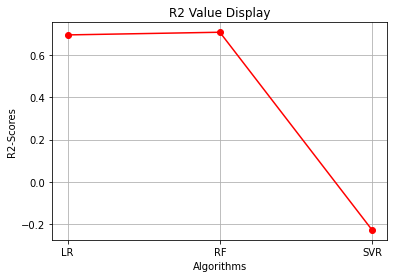

In [132]:
#LR - Linear Regression
#RF - Random Forest Regressor
#Support Vector Regressor
algorithms=["LR", "RF", "SVR"]
Scores=[lr_score,rf_score,svr_score]
plt.plot(algorithms,Scores , marker = 'o',color='red')
plt.grid()
plt.title("R2 Value Display")
plt.xlabel("Algorithms")
plt.ylabel("R2-Scores")
plt.show()